# MANOJ KUMAR - 2048015

### Data Read

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
kidney_disease = pd.read_csv("kidney_disease.csv")
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [3]:
kidney_disease.head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
id,0,1,2,3,4,5,6,7,8,9,10,11
age,48,7,62,48,51,60,68,24,52,53,50,63
bp,80,50,80,70,80,90,70,NaN,100,90,60,70
sg,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02,1.01,1.01
al,1,4,2,4,2,3,0,2,3,2,2,3
su,0,0,3,0,0,0,0,4,0,0,4,0
rbc,NaN,NaN,normal,normal,normal,NaN,NaN,normal,normal,abnormal,NaN,abnormal
pc,normal,normal,normal,abnormal,normal,NaN,normal,abnormal,abnormal,abnormal,abnormal,abnormal
pcc,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present,present,present
ba,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent


In [4]:
# '?' character remove process in the dataset

for i in ['rc','wc','pcv']:
    kidney_disease[i] = kidney_disease[i].str.extract('(\d+)').astype(float)

In [6]:
# Filling missing numeric data in the dataset with mean

for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    kidney_disease[i].fillna(kidney_disease[i].mean(),inplace=True)

In [7]:
# Removing tab spaces in the data

kidney_disease['dm'] = kidney_disease['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'}) 
kidney_disease['cad'] = kidney_disease['cad'].replace(to_replace='\tno',value='no') 
kidney_disease['classification'] = kidney_disease['classification'].replace(to_replace='ckd\t',value='ckd')

In [8]:
# Mapping the text to 1/0 and cleaning the dataset 

kidney_disease[['htn','dm','cad','pe','ane']] = kidney_disease[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
kidney_disease[['rbc','pc']] = kidney_disease[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
kidney_disease[['pcc','ba']] = kidney_disease[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
kidney_disease[['appet']] = kidney_disease[['appet']].replace(to_replace={'good':1,'poor':0})
kidney_disease['classification'] = kidney_disease['classification'].replace(to_replace={'ckd':1,'notckd':0})

kidney_disease.rename(columns={'classification':'class'},inplace=True)

In [9]:
kidney_disease.drop('id',axis=1,inplace=True)
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wc      400 non-null    float64
 17  rc      400 non-null    float64
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

In [10]:
# Filling the missing string data as the most repetitive (mod)

kidney_disease=kidney_disease.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [26]:
features = kidney_disease.keys()
kidney_disease.head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
age,48.000000,7.000000,62.000000,48.000,51.000000,60.000,68.000000,24.000000,52.000000,53.00,50.000000,63.00
bp,80.000000,50.000000,80.000000,70.000,80.000000,90.000,70.000000,76.469072,100.000000,90.00,60.000000,70.00
sg,1.020000,1.020000,1.010000,1.005,1.010000,1.015,1.010000,1.015000,1.015000,1.02,1.010000,1.01
al,1.000000,4.000000,2.000000,4.000,2.000000,3.000,0.000000,2.000000,3.000000,2.00,2.000000,3.00
su,0.000000,0.000000,3.000000,0.000,0.000000,0.000,0.000000,4.000000,0.000000,0.00,4.000000,0.00
rbc,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,1.00,0.000000,1.00
pc,0.000000,0.000000,0.000000,1.000,0.000000,0.000,0.000000,1.000000,1.000000,1.00,1.000000,1.00
pcc,0.000000,0.000000,0.000000,1.000,0.000000,0.000,0.000000,0.000000,1.000000,1.00,1.000000,1.00
ba,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.00
bgr,121.000000,148.036517,423.000000,117.000,106.000000,74.000,100.000000,410.000000,138.000000,70.00,490.000000,380.00


In [12]:
dataset = kidney_disease

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(dataset)

StandardScaler()

In [15]:
scaled_data=scaler.transform(dataset)

In [16]:
scaled_data

array([[-0.20546364,  0.26233836,  0.48335471, ..., -0.4843221 ,
        -0.42008403,  0.77459667],
       [-2.62380991, -1.96658024,  0.48335471, ..., -0.4843221 ,
        -0.42008403,  0.77459667],
       [ 0.62031314,  0.26233836, -1.38139079, ..., -0.4843221 ,
         2.38047614,  0.77459667],
       ...,
       [-2.32888964,  0.26233836,  0.48335471, ..., -0.4843221 ,
        -0.42008403, -1.29099445],
       [-2.03396936, -1.22360737,  1.41572747, ..., -0.4843221 ,
        -0.42008403, -1.29099445],
       [ 0.38437691,  0.26233836,  1.41572747, ..., -0.4843221 ,
        -0.42008403, -1.29099445]])

In [17]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [18]:
x_pca=pca.transform(scaled_data)

In [19]:
scaled_data.shape

(400, 25)

In [20]:
x_pca.shape

(400, 2)

Text(0, 0.5, 'Second principle component')

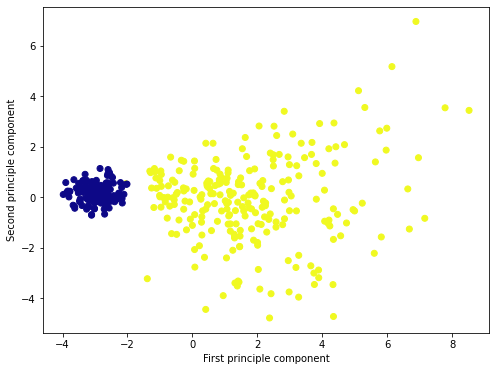

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=dataset['class'], cmap='plasma')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [22]:
pca.components_

array([[ 0.12066011,  0.12527836, -0.23554631,  0.26192431,  0.14912444,
         0.13406829,  0.20940099,  0.15144385,  0.11207517,  0.17172821,
         0.22771716,  0.16623022, -0.16400511,  0.05948067, -0.30245425,
        -0.30140478,  0.08221403, -0.25607369,  0.26107917,  0.23476315,
         0.14295766, -0.18412587,  0.18552824,  0.18073971,  0.29551623],
       [-0.23858469, -0.04156538,  0.09824118, -0.01068182, -0.45643318,
         0.07986895,  0.04165505, -0.08027419, -0.01699011, -0.44459213,
         0.29263267,  0.308222  , -0.20643989,  0.10017756, -0.14470503,
        -0.13340294, -0.18261417, -0.12962845, -0.10129276, -0.28810203,
        -0.11208545, -0.0396537 ,  0.0821878 ,  0.2634413 , -0.07081171]])

In [27]:
df_comp = pd.DataFrame(pca.components_,columns=features)

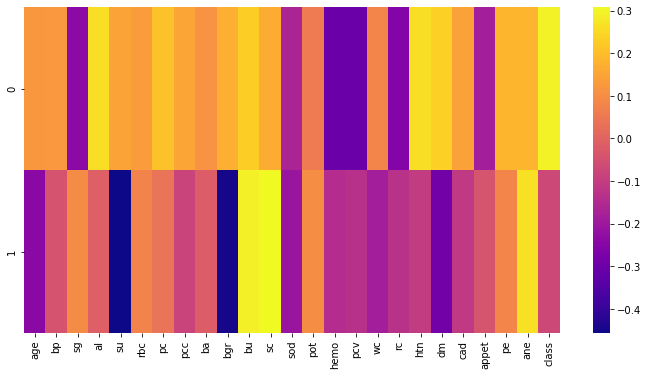

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.


In [29]:
pca.explained_variance_ratio_

array([0.30815418, 0.07457647])